# Logistic Regression (binomial

In [74]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [75]:
digits = load_digits(2)

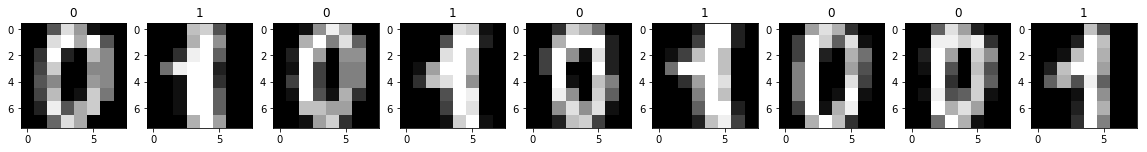

In [95]:
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(20,10))
plt.gray()

for i in range(9):
    axes[i].imshow(digits.images[i])
    axes[i].set_title(digits.target[i])


plt.show()

In [97]:
train_x, test_x, train_y, test_y = train_test_split(digits.images, digits.target)

train_x, test_x = [x.reshape(x.shape[0], -1).T for x in [train_x, test_x]]
train_y, test_y = [y.reshape(1, y.shape[0]) for y in [train_y, test_y]]

train_x.shape, train_y.shape, test_x.shape, test_y.shape

((64, 270), (1, 270), (64, 90), (1, 90))

In [71]:
m = train_x.shape[1]
w = np.random.randn(train_x.shape[0], 1)
b = 0
X = train_x / 16
Y = train_y
alpha = 0.001

for i in range(100000):
    getYHat = lambda X, w: 1 / (1 + np.exp( - (np.dot(w.T, X) + b)))
    getJ = lambda y, y_hat: -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

    Y_hat = getYHat(X, w)
    J = getJ(Y, Y_hat)
    if (i % 10000 == 0): 
        print("Cost: {}".format(J))

    dJdw = (1 / m) * np.dot(X, (Y_hat - Y).T) 

    dJdb = np.mean(Y_hat - Y)

    w = w - alpha * dJdw
    b = b - alpha * dJdb


predict = lambda X, w, b: np.array((1 / (1 + np.exp(-1 * (np.dot(w.T, X) + b)))) > 0.5, dtype=int)
accuracy = lambda y, y_hat: np.mean(y == y_hat) * 100

print("Accuracy on train set: {}%".format(accuracy(Y, predict(X,w,b))))
print("Accuracy on test set: {}%".format(accuracy(test_y, predict(test_x / 16,w,b))))

Cost: 2.514011014852904
Cost: 0.12000226825566779
Cost: 0.0582254736613428
Cost: 0.039050830802436355
Cost: 0.02960417962274723
Cost: 0.02394492153823072
Cost: 0.020162437341940197
Cost: 0.01744987453663046
Cost: 0.015406286169687625
Cost: 0.013809418326309006
Accuracy on train set: 100.0%
Accuracy on test set: 100.0%
